In [22]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

EDA

In [160]:
df_history = pd.read_csv('/content/drive/MyDrive/DATASETS/historic.csv')


In [161]:
df_history.head()


,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [162]:
df_history.info()
df_history.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


In [163]:
df_history.describe()


,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


In [8]:
df.isnull().sum()


item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

(array([1650.,    0.,  739.,    0., 1360.,    0., 1546.,    0., 1459.,
        1246.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

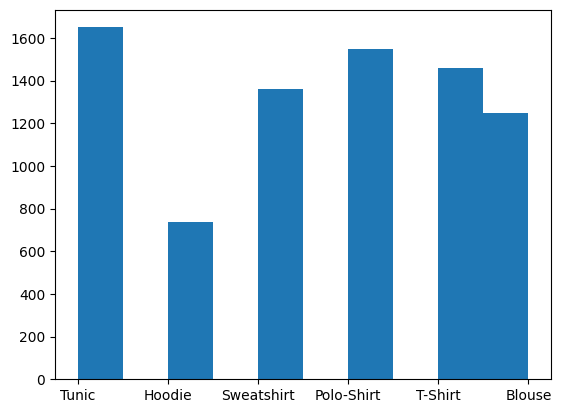

In [9]:
plt.hist(df['category'])

<Axes: xlabel='stars'>

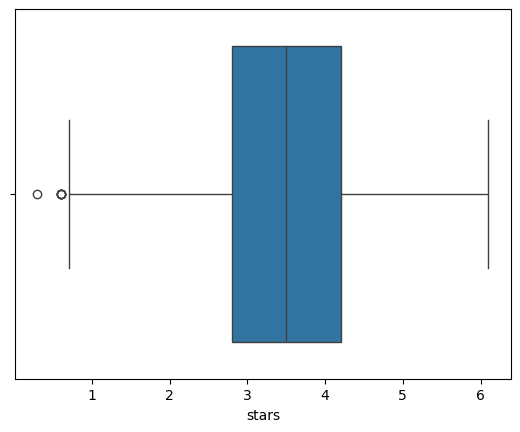

In [10]:
sns.boxplot(x='stars', data=df)

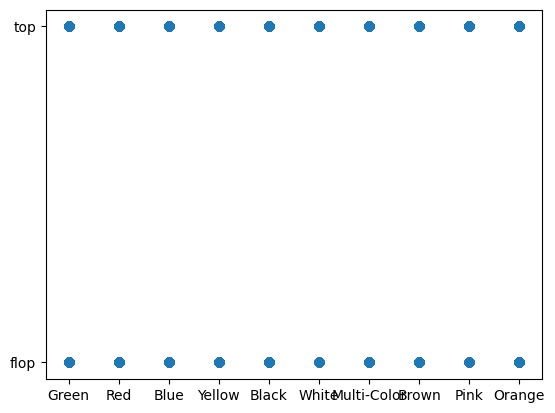

In [12]:
plt.scatter(df['color'], df['success_indicator'])

In [164]:
df_history['stars'] = df_history['stars'].apply(lambda x: min(x, 5))
df_history['stars'].unique()

array([3.1, 1.5, 4.4, 4.1, 3.9, 1.4, 1.8, 3.2, 5. , 2.5, 3.4, 2.7, 1.7,
       2.8, 4.8, 4. , 4.5, 1.3, 2.6, 3.6, 4.9, 2.2, 3.7, 2.3, 3.8, 4.6,
       3.5, 2.9, 1.6, 3. , 4.2, 1.9, 4.3, 4.7, 2. , 1. , 3.3, 2.4, 1.2,
       2.1, 0.7, 0.9, 0.8, 0.6, 1.1, 0.3])

Model using ANN

In [157]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Concatenate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [167]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('/content/drive/MyDrive/DATASETS/historic.csv')

# Extract features and target variable
X = df.drop(['success_indicator'], axis=1)  # Features
y = df['success_indicator']  # Target variable

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical columns
categorical_cols = ['category', 'main_promotion', 'color']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer for classification with softmax activation

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Decode predictions back to original labels
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:\n', conf_matrix)

Epoch 1/10
200/200 [==============================] - 2s 4ms/step - loss: 0.4887 - accuracy: 0.7948 - val_loss: 0.4363 - val_accuracy: 0.8444
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8473 - val_loss: 0.4187 - val_accuracy: 0.8500
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8519 - val_loss: 0.4141 - val_accuracy: 0.8512
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8541 - val_loss: 0.4186 - val_accuracy: 0.8469
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8564 - val_loss: 0.4138 - val_accuracy: 0.8506
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3925 - accuracy: 0.8559 - val_loss: 0.4105 - val_accuracy: 0.8537
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3880 - accuracy: 0.8589 - val_loss: 0.4115 - val_accuracy: 0.8481
Epoch 

MODEL USING XG BOOST

Import Libraries

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


Load and Prepare Data

In [63]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/prediction_input.csv')


In [118]:
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [136]:
X=df[['item_no']]
y=df['success_indicator']

In [137]:
print(f"X_train data type: {type(X_train)}")
print(f"y_train data type: {type(y_train)}")

X_train data type: <class 'pandas.core.frame.DataFrame'>
y_train data type: <class 'pandas.core.series.Series'>


In [138]:
if not isinstance(y_train, np.int64):
    y_train = y_train.astype(np.int64)

In [139]:
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [140]:
y_pred = model.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
import pandas as pd

In [142]:
if y_test.dtype == "object":
    y_test = pd.to_numeric(y_test)
if y_pred.dtype == "object":
    y_pred = pd.to_numeric(y_pred)

In [143]:
print(y_test.dtype)

float64


In [144]:
print(y_pred.dtype)

int64


In [145]:
y_pred = y_pred.astype(int)


In [147]:
y_test = y_test.astype(np.int64)

In [148]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.330625


I have build model using ANN and XG boost. Accuracy of both models are 86% and 33% respectively .So i think ANN is better choice(Deep learning) than XG Boost(Machine Learning)